In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve



Using TensorFlow backend.


In [2]:
import pickle

In [3]:
%run custom_functions.ipynb

In [4]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [5]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [6]:
X = df.drop(['label'], axis = 1)

In [7]:
y = df['label']

In [8]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y,  test_size=0.20, random_state=123)

#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# df_train_full = X_train.copy()
# df_train_full['label']= y_train
# train_full_df.to_csv('train_full_df.csv')

In [9]:
y.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

### Upsampling and Downsampling Training Data

In [10]:
upsample_training_data(X_train, y_train)

,id,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet,label
565,20676,@user f*** this ð¦ðº government that deli...,f this government that deliberately toures #re...,f this government that deliberately toures ref...,"[f, this, government, that, deliberately, tour...","[f, this, govern, that, deliber, tour, refuge,...","[f, this, government, that, deliberately, tour...",f this government that deliberately toures ref...,f this government that deliberately toures ref...,1
21531,24025,despite a demoralizing 2016: may ur #newyear20...,despite a demoralizing may ur #newyear be #cla...,despite a demoralizing may ur newyear be class...,"[despite, a, demoralizing, may, ur, newyear, b...","[despit, a, demor, may, ur, newyear, be, class...","[despite, a, demoralizing, may, ur, newyear, b...",despite a demoralizing may ur newyear be class...,despite a demoralizing may ur newyear be class...,1
13300,18145,"@user #koreans &amp; joseon people in japan, w...",#koreans amp joseon people in japan will abuse...,koreans amp joseon people in japan will abuse ...,"[koreans, amp, joseon, people, in, japan, will...","[korean, amp, joseon, peopl, in, japan, will, ...","[korean, amp, joseon, people, in, japan, will,...",koreans amp joseon people in japan will abuse ...,koreans amp joseon people in japan will abuse ...,1
18925,8506,@user @user @user @user classic ! yet you jewi...,classic yet you jewish bastards wonder why you...,classic yet you jewish bastards wonder why you...,"[classic, yet, you, jewish, bastards, wonder, ...","[classic, yet, you, jewish, bastard, wonder, w...","[classic, yet, you, jewish, bastard, wonder, w...",classic yet you jewish bastards wonder why you...,classic yet you jewish bastards wonder why you...,1
12619,15464,@user did someone say #antisemetic ? gee (((@u...,did someone say #antisemetic gee you re a bit ...,did someone say antisemetic gee you re a bit t...,"[did, someone, say, antisemetic, gee, you, re,...","[did, someon, say, antisemet, gee, you, re, a,...","[did, someone, say, antisemetic, gee, you, re,...",did someone say antisemetic gee you re a bit t...,did someone say antisemetic gee you re a bit t...,1
26964,28937,couldn't have said this any better nor truthfu...,couldn t have said this any better nor truthfu...,couldn t have said this any better nor truthfu...,"[couldn, t, have, said, this, any, better, nor...","[couldn, t, have, said, this, ani, better, nor...","[couldn, t, have, said, this, any, better, nor...",couldn t have said this any better nor truthfu...,couldn t have said this any better nor truthfu...,1
17273,25291,@user racism stuffed into skinny jeans with a ...,racism stuffed into skinny jeans with a hipste...,racism stuffed into skinny jeans with a hipste...,"[racism, stuffed, into, skinny, jeans, with, a...","[racism, stuf, into, skinni, jean, with, a, hi...","[racism, stuffed, into, skinny, jean, with, a,...",racism stuffed into skinny jeans with a hipste...,racism stuffed into skinny jeans with a hipste...,1
1561,12717,the end of #me #selfie # #love #messi #cr7 #...,the end of #me #selfie # #love #messi #cr #rel...,the end of me selfie love messi cr religion c...,"[the, end, of, me, selfie, love, messi, cr, re...","[the, end, of, me, selfi, love, messi, cr, rel...","[the, end, of, me, selfie, love, messi, cr, re...",the end of me selfie love messi cr religion c...,the end of me selfie love messi cr religion c...,1
17875,11612,trump ally wishes mad cow disease death for ob...,trump ally wishes mad cow disease death for ob...,trump ally wishes mad cow disease death for ob...,"[trump, ally, wishes, mad, cow, disease, death...","[trump, alli, wish, mad, cow, diseas, death, f...","[trump, ally, wish, mad, cow, disease, death, ...",trump ally wishes mad cow disease death for ob...,trump ally wishes mad cow disease death for ob...,1
17184,20554,opinion: is rife in the #lgbt community. #gay...,opinion is rife in the #lgbt community #gay pe...,opinio

In [11]:
train_upsampled = upsample_training_data(X_train, y_train)

X_train_up = train_upsampled.drop(['label'], axis = 1)
y_train_up = pd.DataFrame(train_upsampled.label)

In [12]:
train_upsampled['label'].value_counts()

1    18991
0    18991
Name: label, dtype: int64

In [13]:
train_downsampled = downsample_training_data(X_train, y_train)

X_train_down = train_downsampled.drop(['label'], axis = 1)
y_train_down = pd.DataFrame(train_downsampled.label)

In [14]:
train_downsampled['label'].value_counts()

1    1464
0    1464
Name: label, dtype: int64

## Comparing Vectorization and Method Performance

In [15]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression()
rfc = RandomForestClassifier(random_state=10)
nb = GaussianNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



## Testing Fun

In [63]:
%run custom_functions_test.ipynb

In [40]:
compare_metrics

{'Train Accuracy': 0.99,
 'Train Precision': 0.99,
 'Train Recall': 1.0,
 'Train F1': 0.99,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.59,
 'Validation Recall': 0.66,
 'Validation F1': 0.62}

In [44]:
# compare_classification_metrics(y_train_up, y_train_pred, y_val, y_val_pred)

{'Train Accuracy': 0.99,
 'Train Precision': 0.99,
 'Train Recall': 1.0,
 'Train F1': 0.99,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.59,
 'Validation Recall': 0.66,
 'Validation F1': 0.62}

In [ ]:
# compare_class_predictions(y_val, y_val_pred, y_val_pred_prob2)

In [25]:
# X_train_transformed = count_vect.fit_transform(X_train.lem_tweet)
# X_val_transformed = count_vect.transform(X_val.lem_tweet)

# log = LogisticRegression()
# log.fit(X_train_transformed, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# y_train_pred = log.predict(X_train_transformed)
# y_val_pred = log.predict(X_val_transformed)

# # y_train_pred_prob = model.predict_proba(X_train_transformed)
# y_val_pred_prob = log.predict_proba(X_val_transformed)
    

In [52]:
log.fit(X_train_transformed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
%run custom_functions_test.ipynb

In [70]:
log = LogisticRegression(class_weight='balanced', penalty = 'l1')

In [71]:
X_train_transformed, X_val_transformed, y_train_pred, y_val_pred, y_val_pred_prob, matrix, compare_metrics, compare_predictions = \
single_vector_model3(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val,log, count_vect)

AUC: 0.9195300623289754
Average precision-recall score RF: 0.4112376738110019


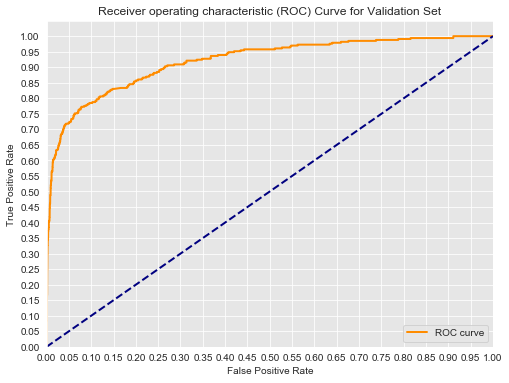

In [72]:
graph_roc_curve(X_train_transformed,X_val_transformed, y_train, y_val)

## Naive Bayes

In [ ]:
np.random.seed(0)

In [ ]:
NB_compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, GaussianNB())

## Logistic Regression

In [ ]:
%run custom_functions_test.ipynb

In [ ]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
LR_cw_lemm = wrapper_compare_vectorizations2(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'), 
                                            vectorization_list, sampling = 'upsample')

LR_cw_lemm

In [ ]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
LR_cw_lemm = wrapper_compare_vectorizations(X_train_up.lem_tweet, 
                            y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'), 
                                            vectorization_list, apply_smote = False)

pd.DataFrame(LR_cw_lemm)

In [ ]:
with open('mycsvfile.csv','a') as f:
    w = csv.writer(f)
    w.writerows(LR_cw_lemm.items())

In [ ]:
(pd.DataFrame.from_dict(data= LR_cw_lemm).to_csv('dict_file.csv', header=False))

In [ ]:
#Logistic Regression: compare vectorizers using stemming + class balances
pd.DataFrame(wrapper_compare_vectorizations(X_train.stem_tweet, 
                            y_train, X_val.stem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'),
                            vectorization_list, apply_smote= True))

### Comparison Functions

In [ ]:
%run custom_functions.ipynb

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val,
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), count_vect)
metrics_dict

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
smote_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                    LogisticRegression(class_weight='balanced', penalty = 'l1'), count_vect)

In [ ]:
val_confusion_matrix

In [ ]:
pred_df

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                    LogisticRegression(class_weight='balanced', penalty = 'l1', random_state=1), count_vect)

In [ ]:
val_confusion_matrix

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1', random_state=1),
                            count_vect, apply_smote = False)

In [ ]:
val_confusion_matrix

#### Multiple Comparison Functions

In [ ]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, 
                            y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state =10, solver = 'lbfgs'),
                            vectorization_list, apply_smote = False)

pd.DataFrame(metrics_dict)

In [ ]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, apply_smote = False)

In [ ]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, apply_smote = True)

#### Testing Wrappers

In [ ]:
%run custom_functions.ipynb

In [ ]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(max_depth=10, random_state=1), 
                            vectorization_list, sampling= 'upsampling')
pd.DataFrame(metrics_dict)

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization2(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=1), count_vect, sampling='downsampling')
metrics_dict

##  Final Logistic Regression Model

In [ ]:
metrics_dict = wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', penalty = 'l1'), 
                            vectorization_list, sampling='help')
pd.DataFrame(metrics_dict)

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=1), count_vect, apply_smote=False)
metrics_dict

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=1), count_vect, apply_smote=True)
metrics_dict

In [ ]:
logreg = LogisticRegression(random_state=10)

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                            logreg, count_vect, apply_smote = False)

In [ ]:
metrics_dict

In [ ]:
y_score = logreg.decision_function(X_val_transformed)
   
fpr, tpr, thresholds = roc_curve(y_val, y_score)
y_val_score = logreg.decision_function(X_val_transformed)
val_fpr, val_tpr, thresholds = roc_curve(y_val, y_val_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Validation Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

average_precision = average_precision_score(y_val, y_val_pred)

print('Average precision-recall score RF: {}'.format(average_precision))

In [ ]:
weighted_predictions_val = []
for item in logreg.predict_proba(X_val_transformed):
    if item[0] <= .85:
        weighted_predictions_val.append(1)
    else:
        weighted_predictions_val.append(0)

In [ ]:
val_confusion_matrix

In [ ]:
#with threshhold adjustment
pd.DataFrame(confusion_matrix(y_val, weighted_predictions_val), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

In [ ]:
pred_df[pred_df['actual_class'] != pred_df['predicted_class']]
pred_df.head()

In [ ]:
pred_df['weighted_predictions'] = weighted_predictions_val
pred_df[pred_df['actual_class'] != pred_df['weighted_predictions']].head()

In [ ]:
df.tweet[11418]

#### Test Set

In [ ]:
X_train_transformed, metrics_dict, train_confusion_matrix, y_test_pred, y_test_prob, test_df = \
\
wrapper_single_vectorization(X_train_up.lem_tweet, y_train_up, X_test.lem_tweet, y_test, 
                            logreg, count_vect, apply_smote = False)

In [ ]:
metrics_dict

In [ ]:
#First calculate the probability scores of each of the datapoints:
y_val_score = model_log.decision_function(X_val)
   
fpr, tpr, thresholds = roc_curve(y_val, y_val_score)
y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

#plot curve
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')

plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score RF: {}'.format(average_precision))


In [ ]:
y_score = logreg.decision_function(X_train)
   
fpr, tpr, thresholds = roc_curve(y_test, y_score)
y_test_score = logreg.decision_function(X_train_transformed)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Validation Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score RF: {}'.format(average_precision))

In [ ]:
weighted_predictions_test = []
for item in logreg.predict_proba(X_train_transformed):
    if item[0] <= .85:
        weighted_predictions_test.append(1)
    else:
        weighted_predictions_test.append(0)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, weighted_predictions_test), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

## SVM


In [ ]:
#class weight = balanced + lemmatized
svm_metrics_balance, svm_X_train_transformed, svm_X_val_transformed = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma='auto', random_state = 10), vectorization_list, apply_smote=False)

In [ ]:
pd.DataFrame(svm_metrics_balance)

In [ ]:
#SMOTE + lemmatized 
svm_metrics_smote, svm_X_train_smote, svm_X_val_smote   = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma='auto', random_state = 10), vectorization_list, apply_smote=False)

In [ ]:
pd.DataFrame(svm_metrics_smote)

In [ ]:
#upsampling + lemmatized
svm_metrics_up, svm_X_train_up, svm_X_val_up = \
wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train, X_val_up.lem_tweet, y_val, 
                                   SVC(gamma='auto', random_state = 10), vectorization_list, apply_smote=False)
pd.DataFrame(svm_metrics_up)

#### Grid Searching:

In [ ]:
wrapper_compare_vectorizations()

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train_up.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
# svc = SVC(kernel='linear', C=1, gamma=1, class_weight ='balanced')

params = {
'C': [0.1,.2, .3, 0.8,1,1.2,1.4],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4]
}

svm_gs= GridSearchCV(svc, param_grid = params, cv = 3)

scores = ['f1','accuracy','recall']

In [ ]:
svm_gs.fit(X_train_tfid2, y_train_up)

In [ ]:
svm_gs.best_estimator_

In [ ]:
single_vector_model()

In [ ]:
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))

# Random Forest

### Compare Multiple Methods:

In [ ]:
# Random Forest: compare vectorizers with class weight balances + lemmatizing 
rfc_metrics_bal = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 10, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), 
                                   vectorization_list, apply_smote=False)
pd.DataFrame(rfc_metrics_bal)

In [ ]:
# Random Forest: compare vectorizers with upsampling + lemmatizing 
rfc_metrics_up = \
wrapper_compare_vectorizations(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), 
                                   vectorization_list, apply_smote=False)
pd.DataFrame(rfc_metrics_up)

In [ ]:
# Random Forest: compare vectorizers with SMOTE + lemmatizing  
rfc_metrics_smote  = \
wrapper_compare_vectorizations(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), 
                                   vectorization_list, apply_smote=False)
pd.DataFrame(rfc_metrics_smote)

In [ ]:
X_val_transformed, metrics_dict, val_confusion_matrix, y_val_pred, y_val_prob, pred_df = \
\
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                    RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10), count_vect)

### Grid-Searching For Best Fit for Count Vectorizer + Upsampling

In [ ]:
np.random.seed(0)
# rfc = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=10, class_weight = 'balanced')

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [ ]:
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100],
'max_leaf_nodes' : [200, 400, 600],
'random_state' : [10],
'max_depth': [5, 7, 10, 20],
 'verbose' : [0],
'class_weight': ['balanced', 'balanced_subsample']}
          
rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv = 3)

In [ ]:
rfc_gs.fit(X_train_countvect, y_train)

In [ ]:
rfc_gs.best_params_

In [ ]:
rfc_gs.best_estimator_

In [ ]:
rfc2 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [ ]:
rfc2.fit(X_train_countvect, y_train)

In [ ]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train, y_train_predict)

In [ ]:
y_val_predict = rfc2.predict(X_val_countvect)

In [ ]:
metrics.f1_score(y_val, y_val_predict)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(rfc2):
    n_features = X_val_countvect.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), rfc2.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), countvect.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc2)

# Word to Vec

In [ ]:
type(df.tokenized_tweet[0])

In [ ]:
(X_train.tokenized_tweet[0])

In [ ]:
X_train.tokenized_tweet.head()

### X-train pre-processing

In [ ]:
X_train.tokenized_tweet.shape

In [ ]:
# X_train['tokenized_tweet']= X_train['tokenized_tweet'].apply(eval)

In [ ]:
X_train_token_list = list(X_train.tokenized_tweet)

In [ ]:
type(X_train_token_list[0])

In [ ]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [ ]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

#### X-val pre-processing

In [ ]:
X_val_token_list = list(X_val['tokenized_tweet'])
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

#### X-test pre-processing

In [ ]:
X_test_token_list = list(X_test['tokenized_tweet'])
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

### Training Model

In [ ]:
from time import time
t = time()

w2v_model = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.train(X_train_token_list, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

In [ ]:
w2v_model.save('data/w2v.model')

w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [ ]:
w2v.corpus_count

In [ ]:
w2v_vocab= w2v.wv.vocab

In [ ]:
len(w2v_vocab)

In [ ]:
w2v.wv.vectors.shape

In [ ]:
w2v.wv['trump']

In [ ]:
w2v.wv.most_similar(['trump'])

In [ ]:
w2v.wv.most_similar(['racist'])

In [ ]:
w2v.wv.most_similar(positive=['lazy','black'])

In [ ]:
w2v.wv

In [ ]:
w2v.wv.get_keras_embedding

In [ ]:
w2v_X = w2v.wv.vectors

## Classification with Word2Vec

In [ ]:
sentence = X_train_token_list[1]
sentence

In [ ]:
X_train_w2v = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_w2v, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))

X_val_w2v = np.empty((5114, 100))
for sentence in X_val_token_list:
    np.append(X_val_w2v, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_w2v[20]

In [ ]:
#create average vector for train and test from model
#returned list of numpy arrays are then stacked 

X_train_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_train_token_list])

X_val_w2v_2 = np.concatenate([avg_word_vectors(word, w2v) for word in X_val_token_list])

In [ ]:
X_train_w2v_2[10]

## Classification with Word Embeddings

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, RandomForestClassifier())

### Glove

In [ ]:
# from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = 'data/glove.twitter.27B.100d.txt'
# glove_output_file = 'data/glove.txt.word2vec'
# glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [ ]:
w2v.most_similar('black')

In [ ]:
glove_model.most_similar('black')

In [ ]:
glove_model['love']

In [ ]:
X_train_token_list[0]

In [ ]:
X_train_glove2 = np.empty((20455, 100))
for sentence in X_train_token_list:
    np.append(X_train_glove2, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_val_token_list])

In [ ]:
X_train_w2v[10]

In [ ]:
X_train_w2v_2[10]

In [ ]:
X_train_glove[255]

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression (class_weight='balanced'))

##  Testing Scraped Trump Tweets

In [ ]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [ ]:
logreg = LogisticRegression(class_weight='balanced')

In [ ]:
logreg.fit(X_train_countvect, y_train_up)

In [ ]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [ ]:
X_trump = X_trump.toarray()

In [ ]:
X_trump.shape

In [ ]:
y_trump_predict = logreg.predict(X_trump)

In [ ]:
y_trump_predict

In [ ]:
trump_df['predictions'] = y_trump_predict

In [ ]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [ ]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [ ]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [ ]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [ ]:
trump0 = trump_df[trump_df.predictions == 0]

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
trump0.tweet

In [ ]:
trump_df

In [ ]:
trump_df[trump_df.predictions == 0]

In [ ]:
trump1 = trump_df[trump_df.predictions == 1]

In [ ]:
trump1.tweet